## <font color='indianred'>Data Scource</font>

https://data.gov.sg/dataset/resident-population-by-ethnicity-gender-and-age-group?view_id=ce206ba3-ea36-46fe-9e9a-6351a9c6805f&resource_id=f9dbfc75-a2dc-42af-9f50-425e4107ae84

## <font color='indianred'>Objectives</font>

#### <font color='blue'>To find the largest Ethnic group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.</font>
#### <font color='blue'>To identify the largest age group in Singapore. Their average population growth over the years.</font>
#### <font color='blue'>Identify the group (by age, ethnicity and gender) that has shown the lowest growth rate.</font>
#### <font color='blue'>Identify the group (by age, ethnicity and gender) that has remained the same.</font>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Singapore.csv')

In [3]:
data.tail()

,year,level_1,level_2,value
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842
20459,2018,Other Ethnic Groups (Females),85 Years & Over,437


## <font color='indianred'>Exploratory Data Analysis</font>

In [73]:
print('DImensions of the data : ', data.shape)

DImensions of the data :  (20460, 4)


In [74]:
data.head(25)

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266
5,1957,Total Residents,25 - 29 Years,111726
6,1957,Total Residents,30 - 34 Years,89925
7,1957,Total Residents,35 - 39 Years,82709
8,1957,Total Residents,40 - 44 Years,76217
9,1957,Total Residents,45 - 49 Years,66716


#### We can see that the data is related to the population with respect to year, type of residents and age group.

In [75]:
data.isnull().sum()

year       0
level_1    0
level_2    0
value      0
dtype: int64

#### We can see that there are no null values in the data

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
year       20460 non-null int64
level_1    20460 non-null object
level_2    20460 non-null object
value      20460 non-null object
dtypes: int64(1), object(3)
memory usage: 639.5+ KB


#### We can see that value feature which gives the population is not in numeric form. Instead it is in object data type which indicates that there might be some strings in this feature.

In [77]:
data.describe()

,year
count,20460.000000
mean,1987.500000
std,17.895968
min,1957.000000
25%,1972.000000
50%,1987.500000
75%,2003.000000
max,2018.000000


#### After few operations on the data, it turned out that there is a string 'na' in value feature. So, to inspect the records with 'na' in values feature, let us take them in separate data frame.

In [78]:
noval=data[data.value=='na'] #noval is the dataframe name that tells about no values in the value feature
noval.head(20)

,year,level_1,level_2,value
344,1958,Total Residents,70 - 74 Years,na
345,1958,Total Residents,75 - 79 Years,na
346,1958,Total Residents,80 - 84 Years,na
349,1958,Total Residents,75 Years & Over,na
350,1958,Total Residents,80 Years & Over,na
351,1958,Total Residents,85 Years & Over,na
366,1958,Total Male Residents,70 - 74 Years,na
367,1958,Total Male Residents,75 - 79 Years,na
368,1958,Total Male Residents,80 - 84 Years,na
371,1958,Total Male Residents,75 Years & Over,na


#### 65 Years & Over	,70 Years & Over,	75 Years & Over, 	80 Years & Over are giveing the redundant information as we already have separate classes for 65 - 69 Years	, 70 - 74 Years	, 75 - 79 Years, 80 - 84 Years. So, lets drop the records with these classes. Hence, numbers are not assigned to this classes. The below dataset shows classes in level_2 after chaning strings to numeric data.

#### To build machine learning models (i.e. Time series algorithms), all the features in the data need to be in numeric format. So, let us convert the categorical feature to numerical. As age is ordinal data, we can give numbers in order to represent the order in the age.

In [79]:
data.level_2.replace({'0  -  4 Years':1,'5  -  9 Years':2,'10 - 14 Years':3,'15 - 19 Years':4,'20 - 24 Years':5,
                     '25 - 29 Years':6,'30 - 34 Years':7,'35 - 39 Years':8,'40 - 44 Years':9,'45 - 49 Years':10,
                     '50 - 54 Years':11,'55 - 59 Years':12,'60 - 64 Years':13,'65 - 69 Years':14,'70 - 74 Years':15,
                     '75 - 79 Years':16,'80 - 84 Years':17,'85 Years & Over':18},inplace=True)

In [80]:
data.head(20)

,year,level_1,level_2,value
0,1957,Total Residents,1,264727
1,1957,Total Residents,2,218097
2,1957,Total Residents,3,136280
3,1957,Total Residents,4,135679
4,1957,Total Residents,5,119266
5,1957,Total Residents,6,111726
6,1957,Total Residents,7,89925
7,1957,Total Residents,8,82709
8,1957,Total Residents,9,76217
9,1957,Total Residents,10,66716


In [81]:
data=data[(data.level_2!=15) & (data.level_2!=16) & (data.level_2!=17)
          & (data.level_2!='65 Years & Over') & (data.level_2!='70 Years & Over')
           & (data.level_2!='75 Years & Over') & (data.level_2!='80 Years & Over')]
data.shape

(13950, 4)

#### After dropping the classes 65years and above, 70 years and above, 75 years and above and 80 years and above, number of records has been reduced from 20460 to 13950.

In [82]:
noval.year.unique()

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

#### years that have no data about population with respective to few specific age groups is from 1958 to 1989

In [83]:
#noval is the dataframe name that tells about no values in the value feature
noval.shape

(2460, 4)

#### After removing the redundant records, 465 records has no values in the value feature.465 consititutes 35 out of 13950 records. As the number is of no values is minute, lets drop them for cleaner data. 

In [84]:
data=data[data.value!='na']
data.shape

(13485, 4)

#### After cleaning the data and removing the redundant information, dimensions of the data turned out to be 13485,4

In [85]:
data.value=data.value.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 0 to 20459
Data columns (total 4 columns):
year       13485 non-null int64
level_1    13485 non-null object
level_2    13485 non-null object
value      13485 non-null int64
dtypes: int64(2), object(2)
memory usage: 526.8+ KB


#### Let us group by the data with respect to year and Level_1

In [86]:
grp=data.groupby(['year','level_1']).sum().reset_index()
grp.head()

,year,level_1,value
0,1957,Other Ethnic Groups (Females),16050
1,1957,Other Ethnic Groups (Males),17665
2,1957,Other Ethnic Groups (Total),33715
3,1957,Total Chinese,1078144
4,1957,Total Female Chinese,526660


#### Here a dataframe is created such that, grouping is done considering the ethinc groups. Thereby, different ethnic groups data is merged for each year.

In [87]:
ethinicity=grp[(grp['level_1']=='Total Chinese') | (grp['level_1']=='Total Malays') | 
               (grp['level_1']=='Total Indians')|  (grp['level_1']=="Other Ethnic Groups (Total)")]
ethinicity.head(10)

,year,level_1,value
2,1957,Other Ethnic Groups (Total),33715
3,1957,Total Chinese,1078144
8,1957,Total Indians,123636
9,1957,Total Malays,195649
17,1958,Other Ethnic Groups (Total),28400
18,1958,Total Chinese,1135800
23,1958,Total Indians,130800
24,1958,Total Malays,207200
32,1959,Other Ethnic Groups (Total),29200
33,1959,Total Chinese,1189900


In [88]:
export_csv = ethinicity.to_csv (r'C:\Users\Hemanth\GeoIQ\ethinicity.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#### In the dataframe 'gender', grouping  of data is done considering the gender

In [89]:
gender=grp[(grp['level_1']!='Total Residents')& (grp['level_1']!='Total Chinese') &(grp['level_1']!='Total Malays')& 
               (grp['level_1']!='Total Indians')&(grp['level_1']!="Other Ethnic Groups (Total)")]
gender.head(10)

,year,level_1,value
0,1957,Other Ethnic Groups (Females),16050
1,1957,Other Ethnic Groups (Males),17665
4,1957,Total Female Chinese,526660
5,1957,Total Female Indians,37977
6,1957,Total Female Malays,93045
7,1957,Total Female Residents,673732
10,1957,Total Male Chinese,551484
11,1957,Total Male Indians,85659
12,1957,Total Male Malays,102604
13,1957,Total Male Residents,757412


In [90]:
export_csv = gender.to_csv (r'C:\Users\Hemanth\GeoIQ\gender.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

#### In the dataframe 'age', grouping is done as per the age group with respect to Total population.

In [91]:
age=data[data.level_1=='Total Residents']
age.head(20)

,year,level_1,level_2,value
0,1957,Total Residents,1,264727
1,1957,Total Residents,2,218097
2,1957,Total Residents,3,136280
3,1957,Total Residents,4,135679
4,1957,Total Residents,5,119266
5,1957,Total Residents,6,111726
6,1957,Total Residents,7,89925
7,1957,Total Residents,8,82709
8,1957,Total Residents,9,76217
9,1957,Total Residents,10,66716


In [92]:
export_csv = age.to_csv (r'C:\Users\Hemanth\GeoIQ\age.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## <font color='indianred'>Visualizing the data</font>

### <font color='indianred'>Population trend</font>

In [93]:
tot_pop=grp[grp['level_1']=='Total Residents']
tot_pop.head()

,year,level_1,value
14,1957,Total Residents,1431144
29,1958,Total Residents,1502200
44,1959,Total Residents,1569300
59,1960,Total Residents,1627300
74,1961,Total Residents,1682600


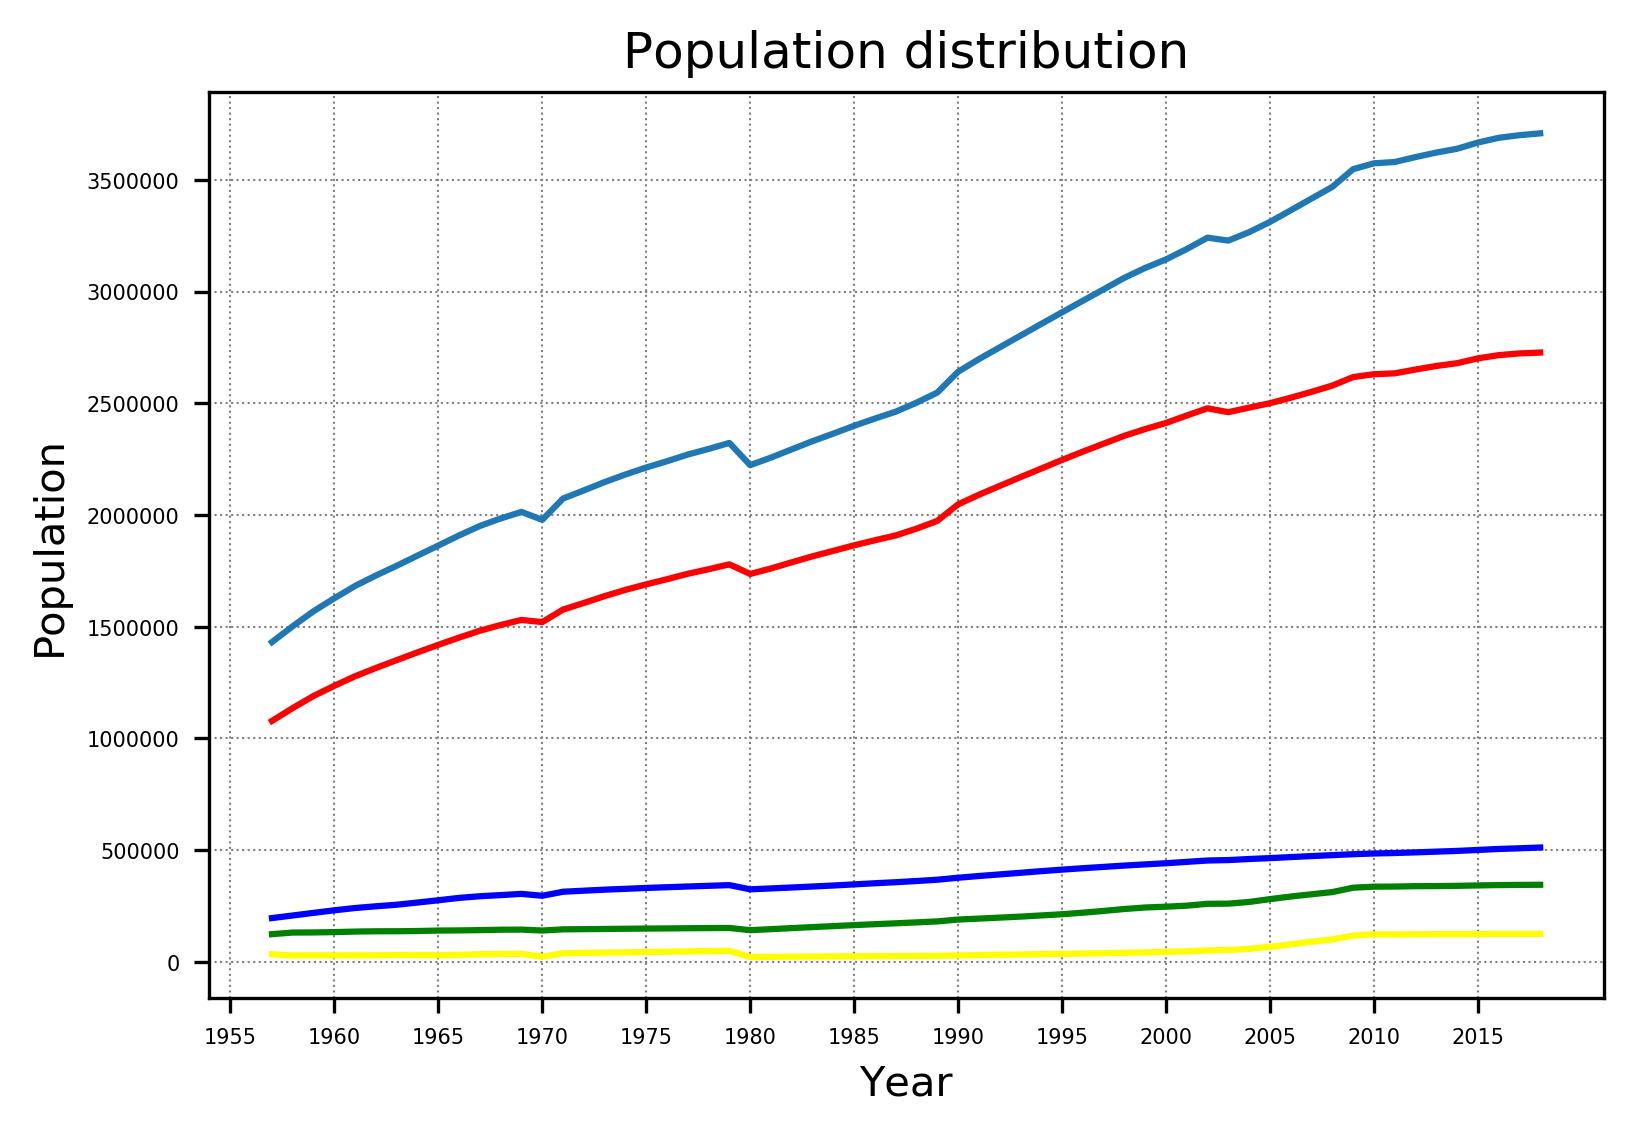

In [142]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.title('Population distribution')
plt.xlabel('Year')
plt.ylabel('Population')
plt.plot(tot_pop.year, tot_pop.value, linestyle='-')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Total Chinese"].value, color='red')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Total Indians"].value, color='green')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Total Malays"].value, color='blue')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Other Ethnic Groups (Total)"].value, color='yellow')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()


#### Blue=Total population, Red=chinese population, Blue=Malay population, Green=Indian population, yellow=Other ethinic groups population

#### We can clearly observe that there is an increasing trend in the population of Singapore. The rate of increase in population has increased since 1980 which can understood by sharp increase in slope of the trend. Among all the ethnic groups, China contributes maximum population

### The below cell calculates the population growth

In [95]:
population=list(tot_pop.value)
growth_rate=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [96]:
tot_pop['growth_rate']=growth_rate
tot_pop.head()

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,level_1,value,growth_rate
14,1957,Total Residents,1431144,NaN
29,1958,Total Residents,1502200,4.96
44,1959,Total Residents,1569300,4.47
59,1960,Total Residents,1627300,3.70
74,1961,Total Residents,1682600,3.40


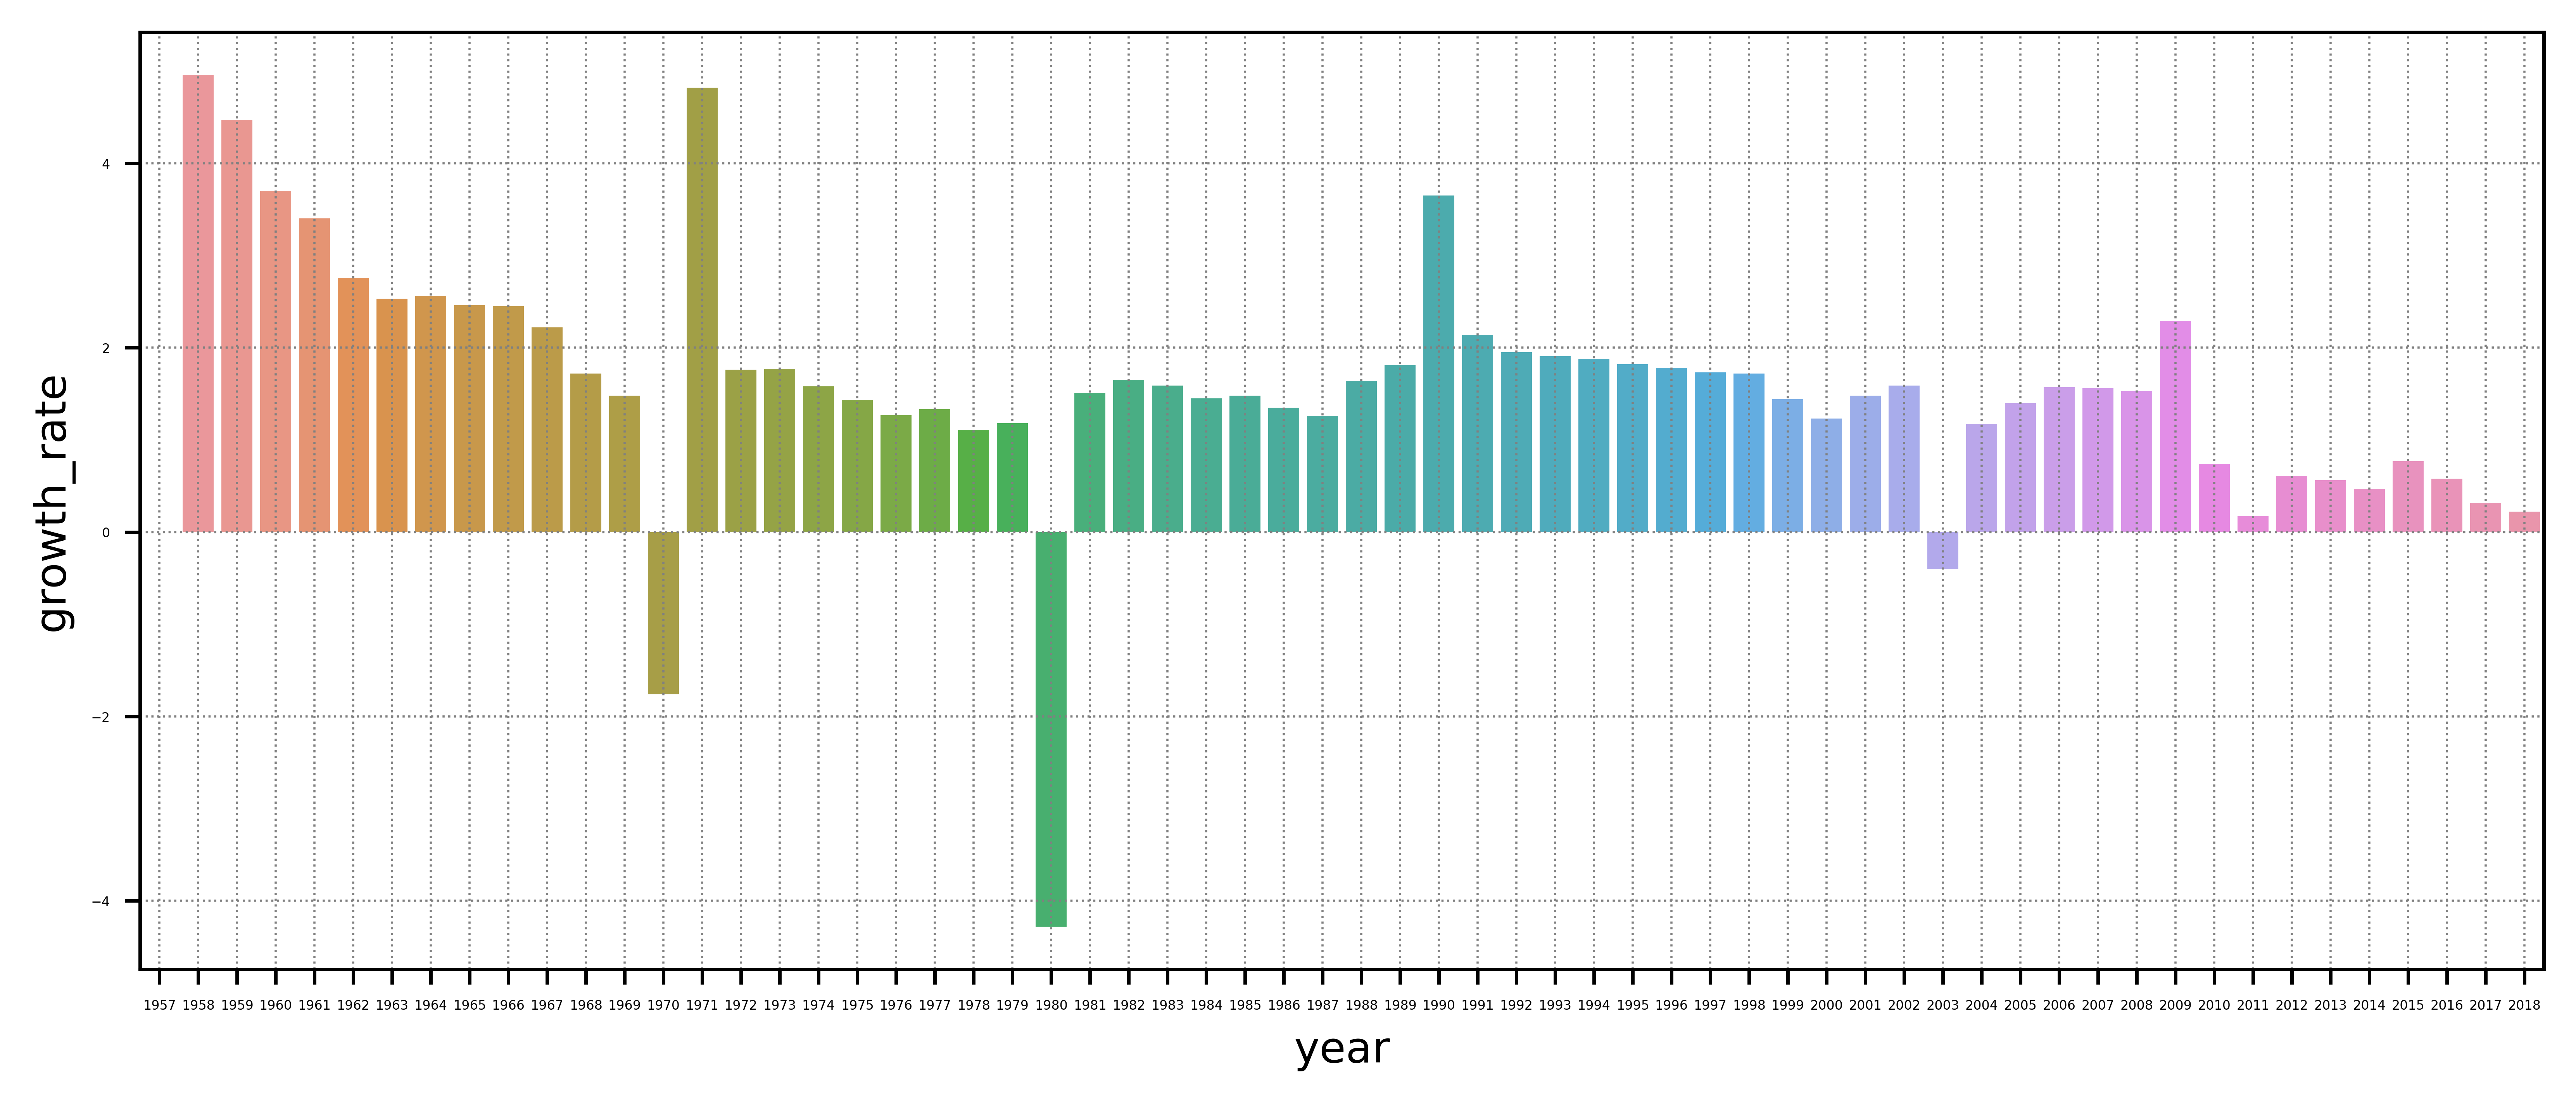

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,4),dpi=400)
a=sns.barplot(x=tot_pop.year, y=tot_pop.growth_rate)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.tick_params(axis='both', which='major', labelsize=3)
plt.show()

### We can observe that in 3 years 1970, 1980, 2003 there is population growth is negative  , in all the years there is growth in population is postive. The maximum population growth is observed in the yeas 1958 and 1973.

## <font color='indianred'>Growth rate with respect to ethinicity</font>

In [98]:
population=list(ethinicity[ethinicity.level_1=="Total Chinese"].value)
growth_rate_china=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_china.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [99]:
population=list(ethinicity[ethinicity.level_1=="Total Indians"].value)
growth_rate_india=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_india.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [100]:
population=list(ethinicity[ethinicity.level_1=="Total Malays"].value)
growth_rate_malay=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_malay.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [101]:
population=list(ethinicity[ethinicity.level_1=="Other Ethnic Groups (Total)"].value)
growth_rate_other=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_other.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

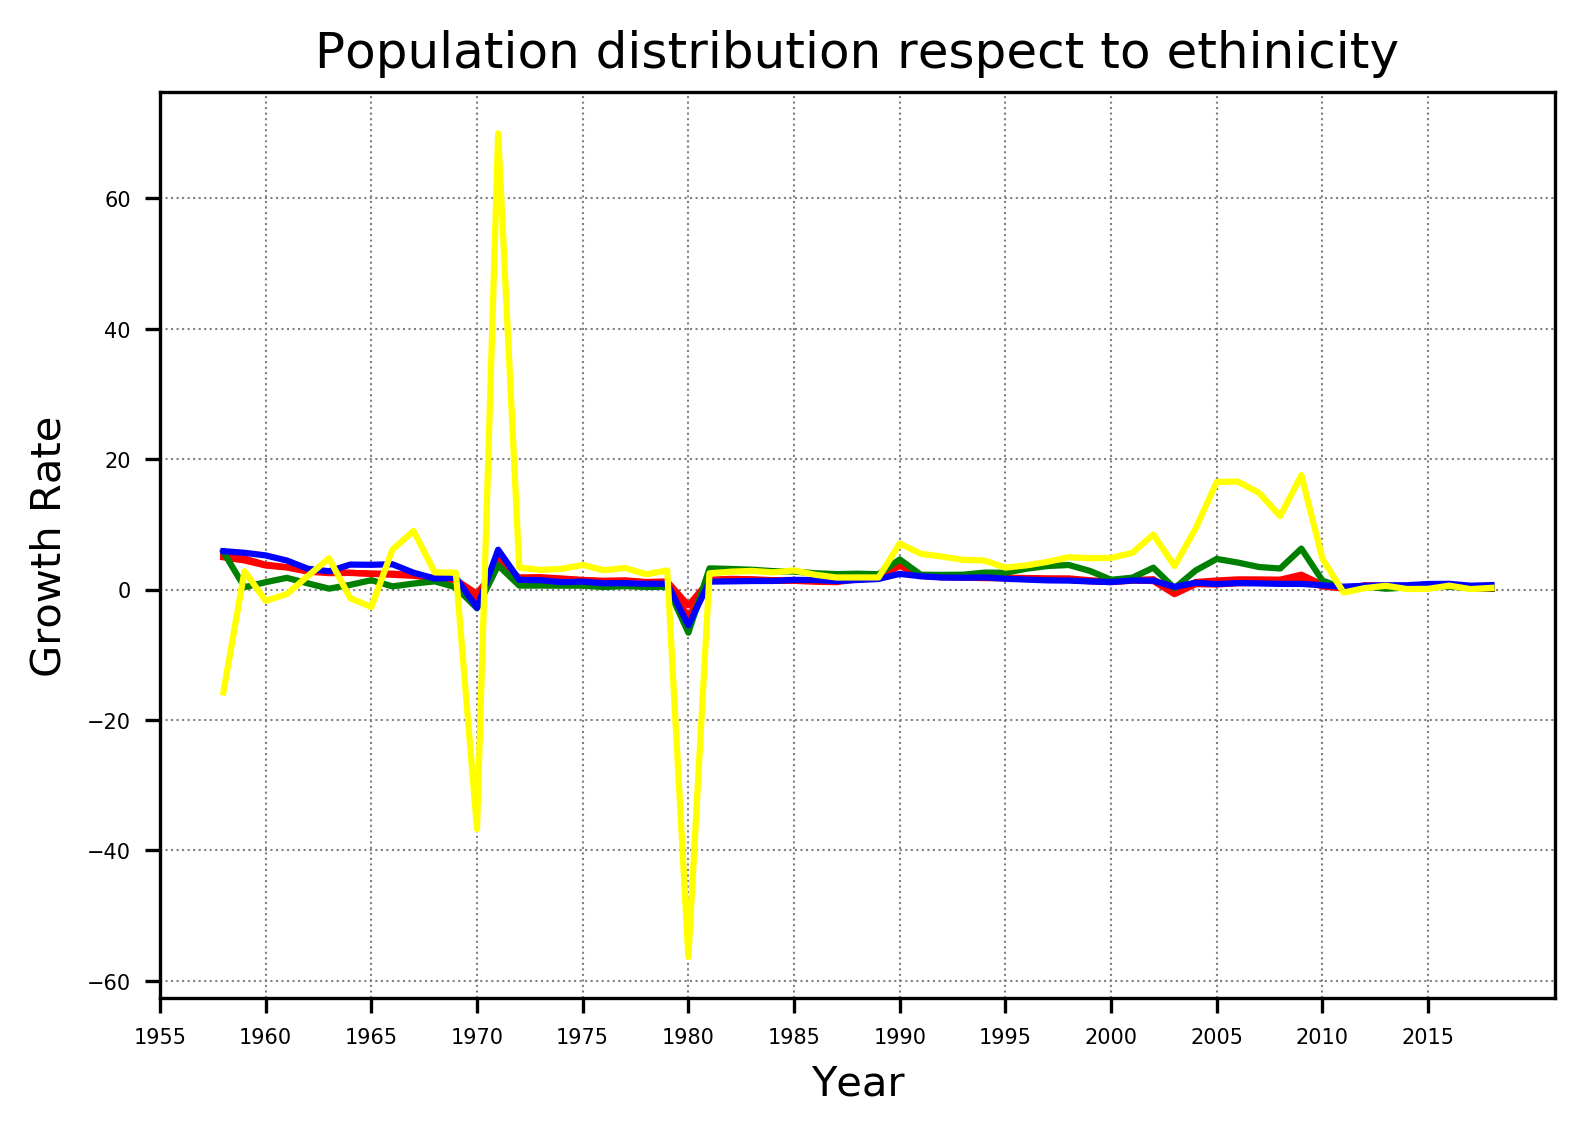

In [144]:
%config InlineBackend.figure_format = 'retina'
plt.figure(dpi=150)
plt.title('Population distribution respect to ethinicity')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.plot(tot_pop.year, growth_rate,color='red')
plt.plot(tot_pop.year, growth_rate_china, color='red')
plt.plot(tot_pop.year, growth_rate_india, color='green')
plt.plot(tot_pop.year, growth_rate_malay, color='blue')
plt.plot(tot_pop.year, growth_rate_other, color='yellow')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))
plt.tick_params(axis='both', which='major', labelsize=5)


#### Blue=Malay population growth, Red=chinese population growth, Blue=Malay population growth, Green=Indian population growth, yellow=Other ethinic groups population growth. We can see that there is very little variation in population growth for all the ethinc groups. But, growwth in other ethinc groups is verying drstically. 

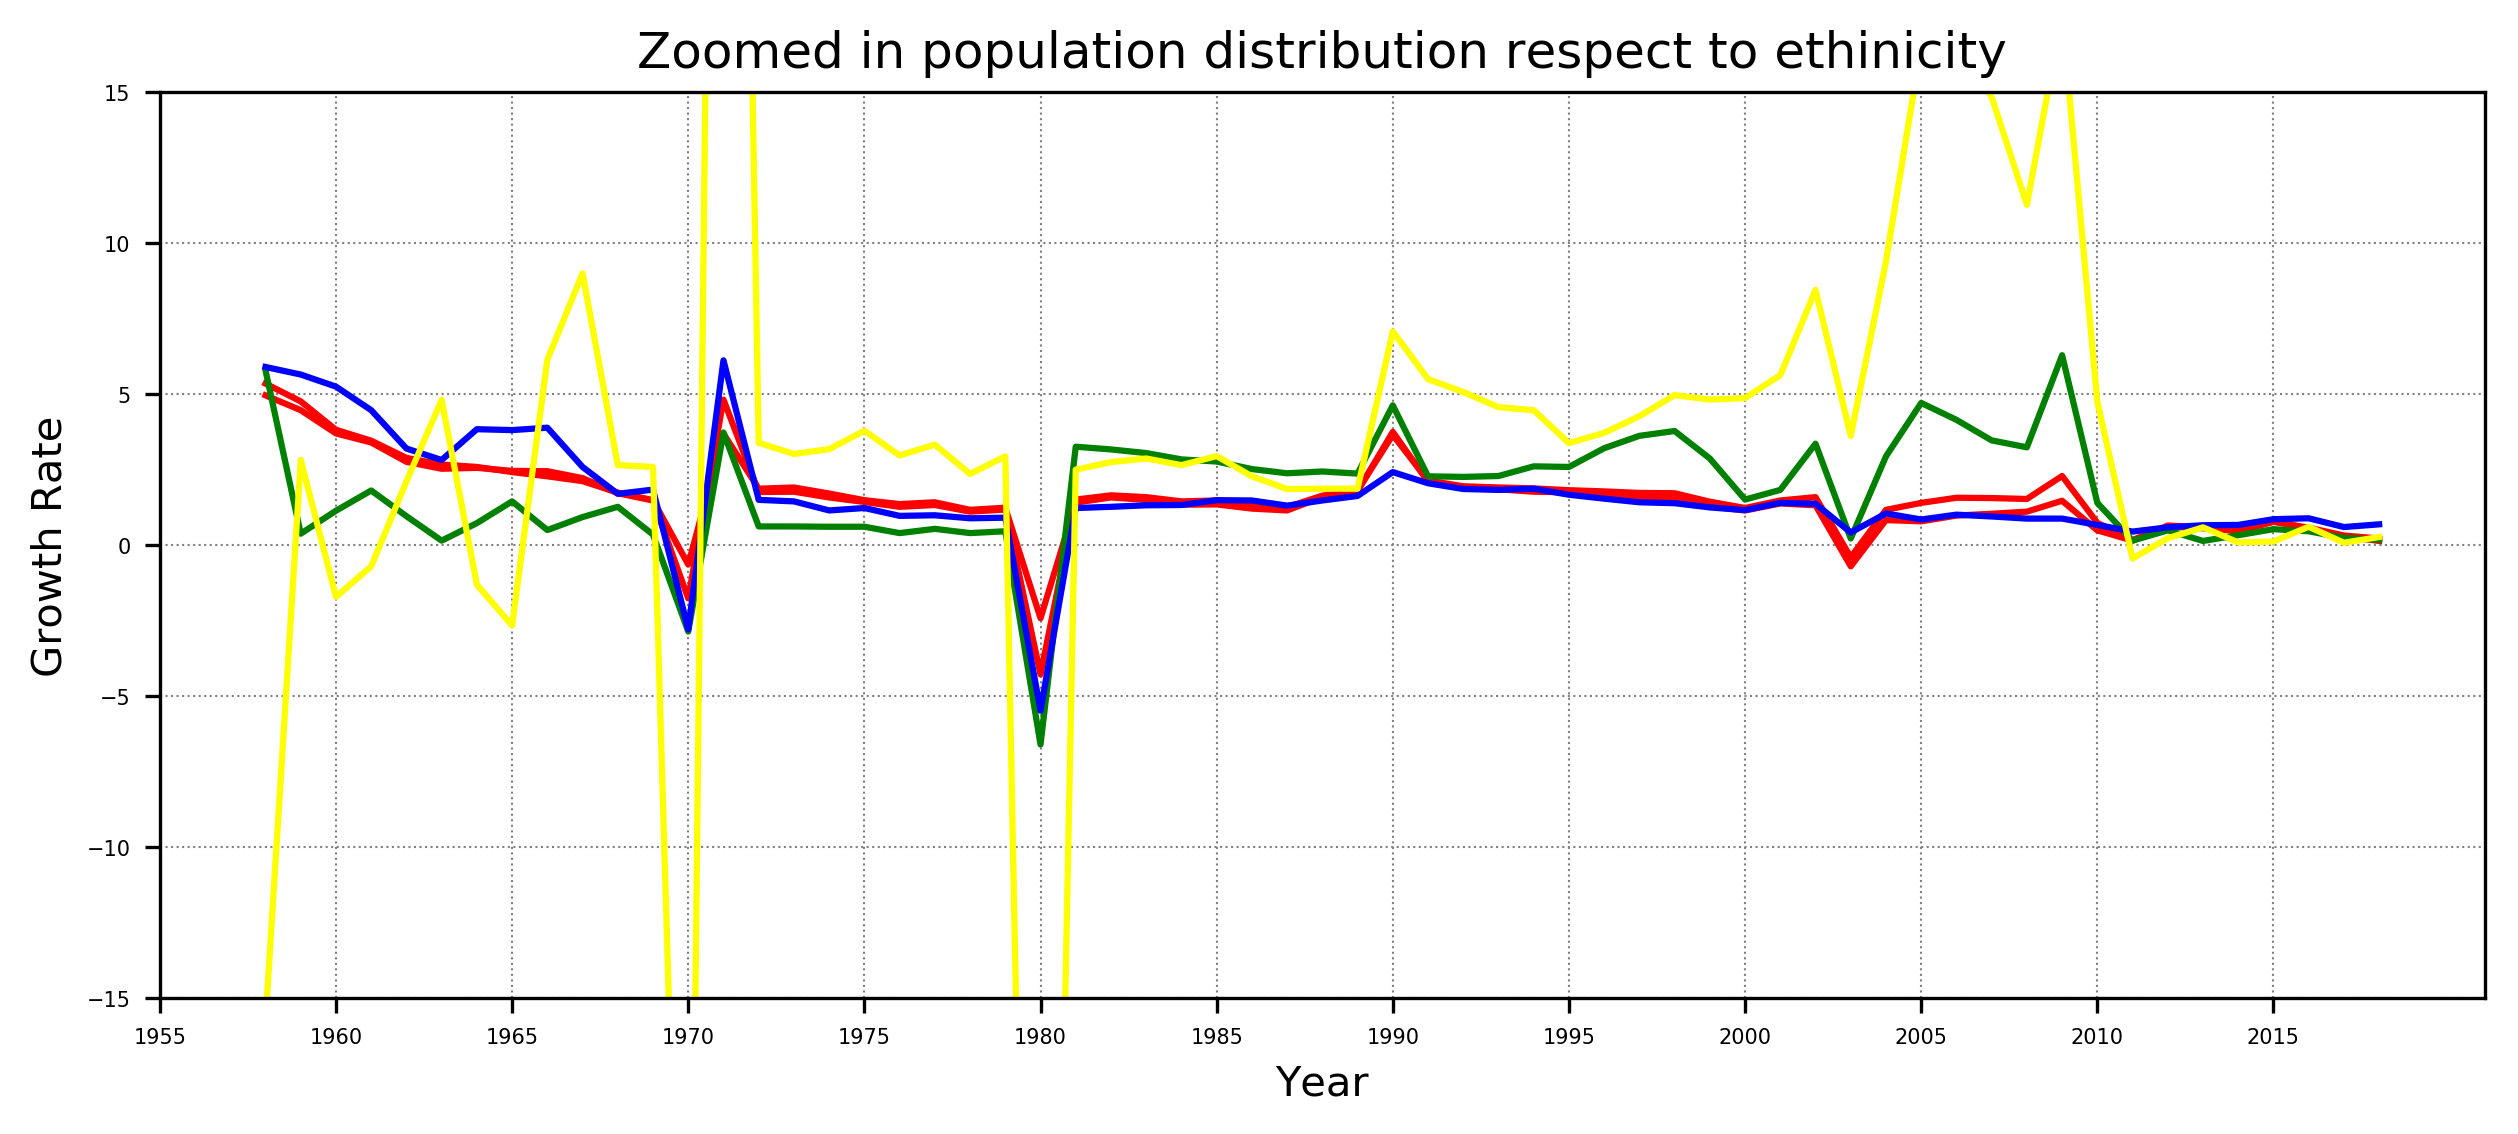

In [145]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,4),dpi=150)
plt.title('Zoomed in population distribution respect to ethinicity')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.plot(tot_pop.year, growth_rate,color='red')
plt.plot(tot_pop.year, growth_rate_china, color='red')
plt.plot(tot_pop.year, growth_rate_india, color='green')
plt.plot(tot_pop.year, growth_rate_malay, color='blue')
plt.plot(tot_pop.year, growth_rate_other, color='yellow')
plt.ylim(-15,15)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))
plt.tick_params(axis='both', which='major', labelsize=5)

#### The above plot is zoomed in version of population growth trend with respect to ethinc groups with respect to years.

## <font color='indianred'>Gender wise growth rate distribution</font>

In [104]:
population=list(grp[grp.level_1=="Total Male Residents"].value)
growth_rate_male=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_male.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [105]:
population=list(grp[grp.level_1=="Total Female Residents"].value)
growth_rate_female=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_female.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

([<matplotlib.axis.XTick at 0x11fe9ce07b8>,
 <a list of 13 Text xticklabel objects>)

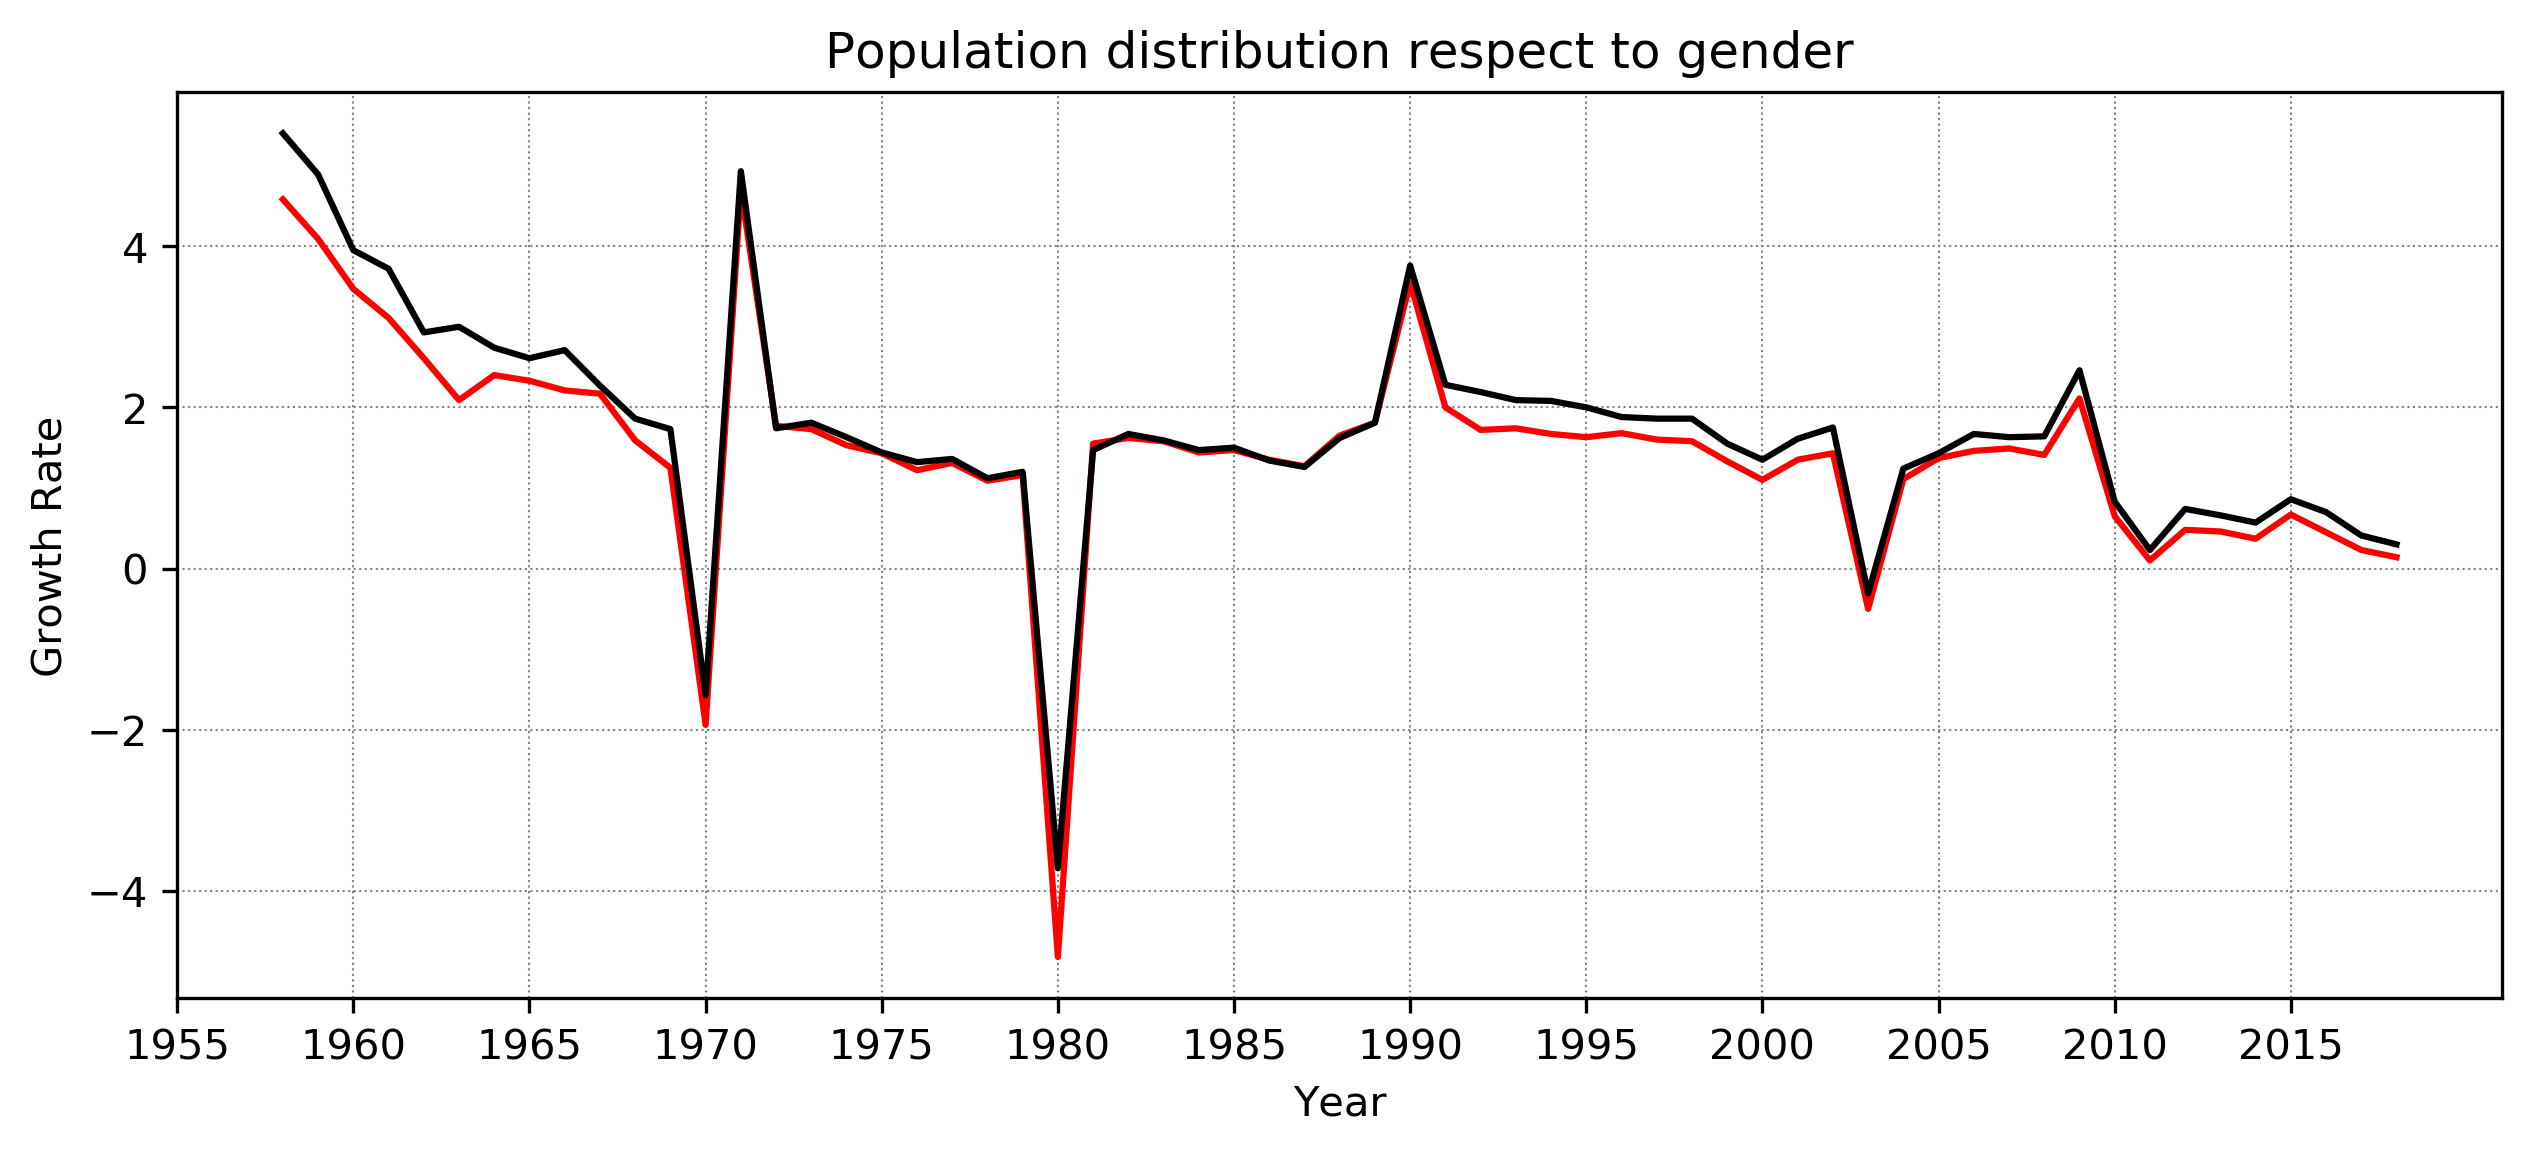

In [146]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,4),dpi=150)
plt.title('Population distribution respect to gender')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.plot(tot_pop.year, growth_rate_male,color='red')
plt.plot(tot_pop.year, growth_rate_female, color='black')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))


### The above plot shows teh population growth trend for male and female. Red represents the male population while black represents the femal population growth. For larege extenet, male and female population growth and decline are happening accordingly. That means, there is no much difference in population growth between male and female.

# <font color='indianred'>Age wise</font>

In [107]:
age.level_2.value_counts()

14    62
13    62
12    62
11    62
10    62
9     62
8     62
7     62
6     62
5     62
4     62
3     62
2     62
1     62
18    31
Name: level_2, dtype: int64

## The following cells calculates the population growth for different age people.

In [108]:
population=list(age[age.level_2==1].value)
growth_rate_1=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_1.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [109]:
population=list(age[age.level_2==2].value)
growth_rate_2=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_2.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [110]:
population=list(age[age.level_2==3].value)
growth_rate_3=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_3.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [111]:
population=list(age[age.level_2==4].value)
growth_rate_4=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_4.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [112]:
population=list(age[age.level_2==5].value)
growth_rate_5=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_5.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [113]:
population=list(age[age.level_2==6].value)
growth_rate_6=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_6.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [114]:
population=list(age[age.level_2==7].value)
growth_rate_7=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_7.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [115]:
population=list(age[age.level_2==8].value)
growth_rate_8=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_8.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [116]:
population=list(age[age.level_2==9].value)
growth_rate_9=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_9.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [117]:
population=list(age[age.level_2==10].value)
growth_rate_10=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_10.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [118]:
population=list(age[age.level_2==11].value)
growth_rate_11=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_11.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [119]:
population=list(age[age.level_2==12].value)
growth_rate_12=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_12.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [120]:
population=list(age[age.level_2==13].value)
growth_rate_13=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_13.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [121]:
population=list(age[age.level_2==14].value)
growth_rate_14=[np.nan]
for i in range(0,len(tot_pop)-1):
    growth_rate_14.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [122]:
population=list(age[age.level_2==18].value)
growth_rate_18=[np.nan]
for i in range(0,30):
    growth_rate_18.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

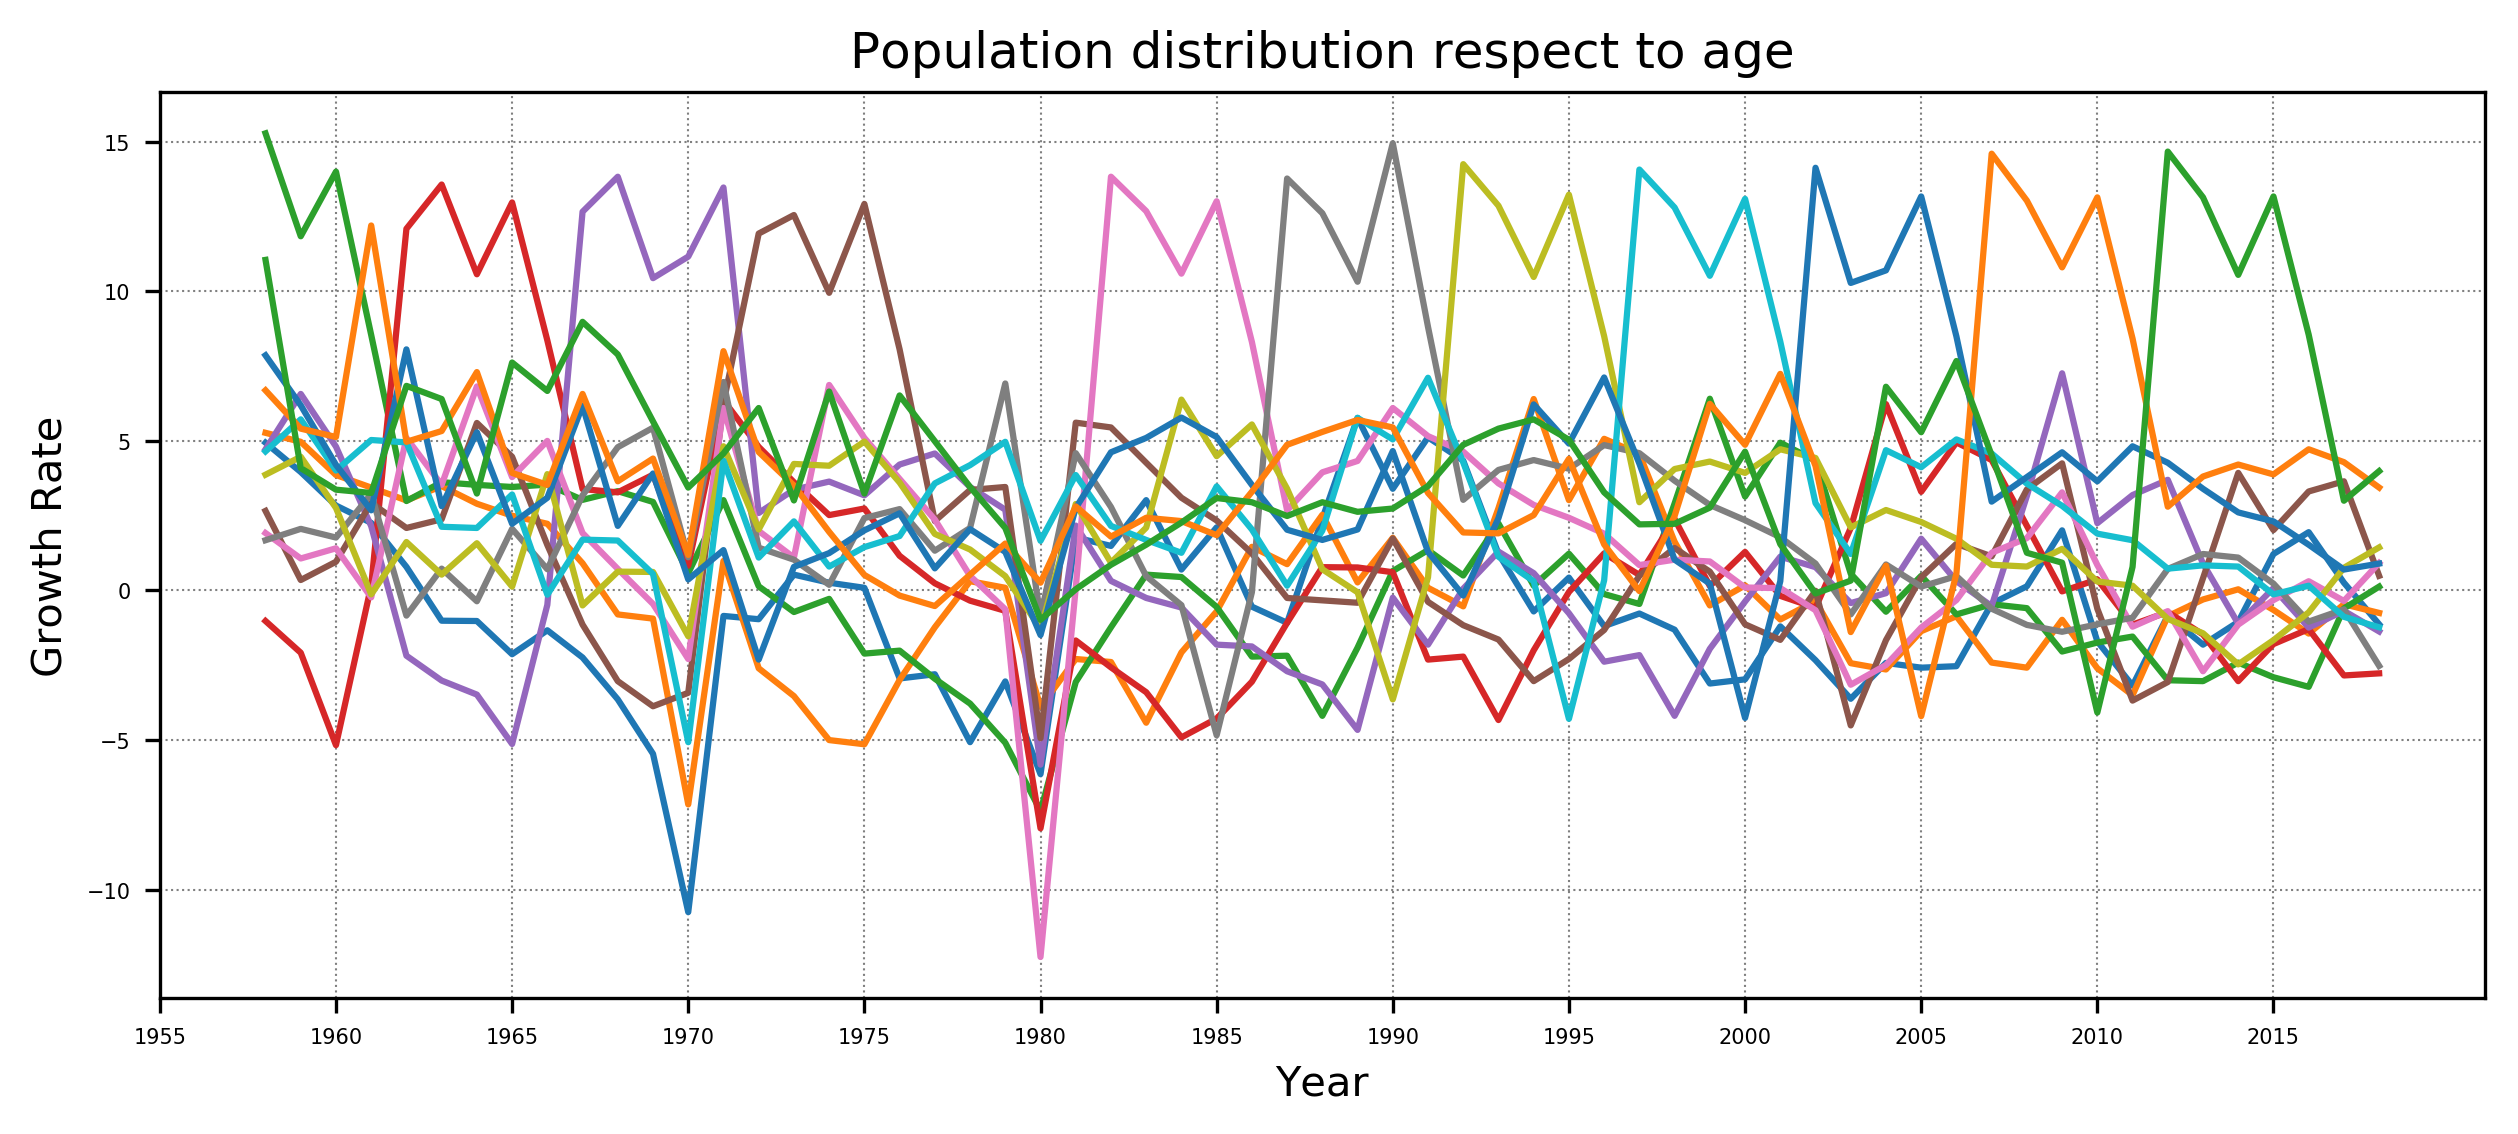

In [147]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,4),dpi=150)
plt.title('Population distribution respect to age')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.plot(tot_pop.year, growth_rate_1)
plt.plot(tot_pop.year, growth_rate_2)
plt.plot(tot_pop.year, growth_rate_3)
plt.plot(tot_pop.year, growth_rate_4)
plt.plot(tot_pop.year, growth_rate_5)
plt.plot(tot_pop.year, growth_rate_6)
plt.plot(tot_pop.year, growth_rate_8)
plt.plot(tot_pop.year, growth_rate_9)
plt.plot(tot_pop.year, growth_rate_10)
plt.plot(tot_pop.year, growth_rate_11)
plt.plot(tot_pop.year, growth_rate_12)
plt.plot(tot_pop.year, growth_rate_13)
plt.plot(tot_pop.year, growth_rate_14)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))
plt.tick_params(axis='both', which='major', labelsize=5)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.show()

#### the plot is a bit clumspy, but can be zoomed in by clicking on the plot. There is lot of variation in population growth with respect to age. One observation is that, every age group has at some point of time has  drastic increse in the population growth.

## <font color='indianred'>Age and ethinicity</font>

In [124]:
grp.level_1.value_counts()

Total Female Indians             62
Other Ethnic Groups (Total)      62
Total Male Malays                62
Total Female Residents           62
Total Male Chinese               62
Other Ethnic Groups (Females)    62
Total Male Residents             62
Total Female Chinese             62
Total Chinese                    62
Total Male Indians               62
Other Ethnic Groups (Males)      62
Total Malays                     62
Total Female Malays              62
Total Residents                  62
Total Indians                    62
Name: level_1, dtype: int64

In [125]:
population=list(grp[grp.level_1=='Total Male Indians'].value)
growth_rate_maleindia=[np.nan]
for i in range(0,61):
    growth_rate_maleindia.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [126]:
population=list(grp[grp.level_1=='Total Male Chinese'].value)
growth_rate_malechina=[np.nan]
for i in range(0,61):
    growth_rate_malechina.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [127]:
population=list(grp[grp.level_1=='Total Male Malays'].value)
growth_rate_malemalay=[np.nan]
for i in range(0,61):
    growth_rate_malemalay.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [128]:
population=list(grp[grp.level_1=="Other Ethnic Groups (Males)"].value)
growth_rate_maleother=[np.nan]
for i in range(0,61):
    growth_rate_maleother.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [129]:
population=list(grp[grp.level_1=='Total Female Indians'].value)
growth_rate_femaleindia=[np.nan]
for i in range(0,61):
    growth_rate_femaleindia.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [130]:
population=list(grp[grp.level_1=='Total Female Chinese'].value)
growth_rate_femalechina=[np.nan]
for i in range(0,61):
    growth_rate_femalechina.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [131]:
population=list(grp[grp.level_1=='Total Female Malays'].value)
growth_rate_femalemalay=[np.nan]
for i in range(0,61):
    growth_rate_femalemalay.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

In [132]:
population=list(grp[grp.level_1=="Other Ethnic Groups (Females)"].value)
growth_rate_femaleother=[np.nan]
for i in range(0,61):
    growth_rate_femaleother.append(np.round( ((population[i+1] - population[i]) * 100.0 / population[i]),2))

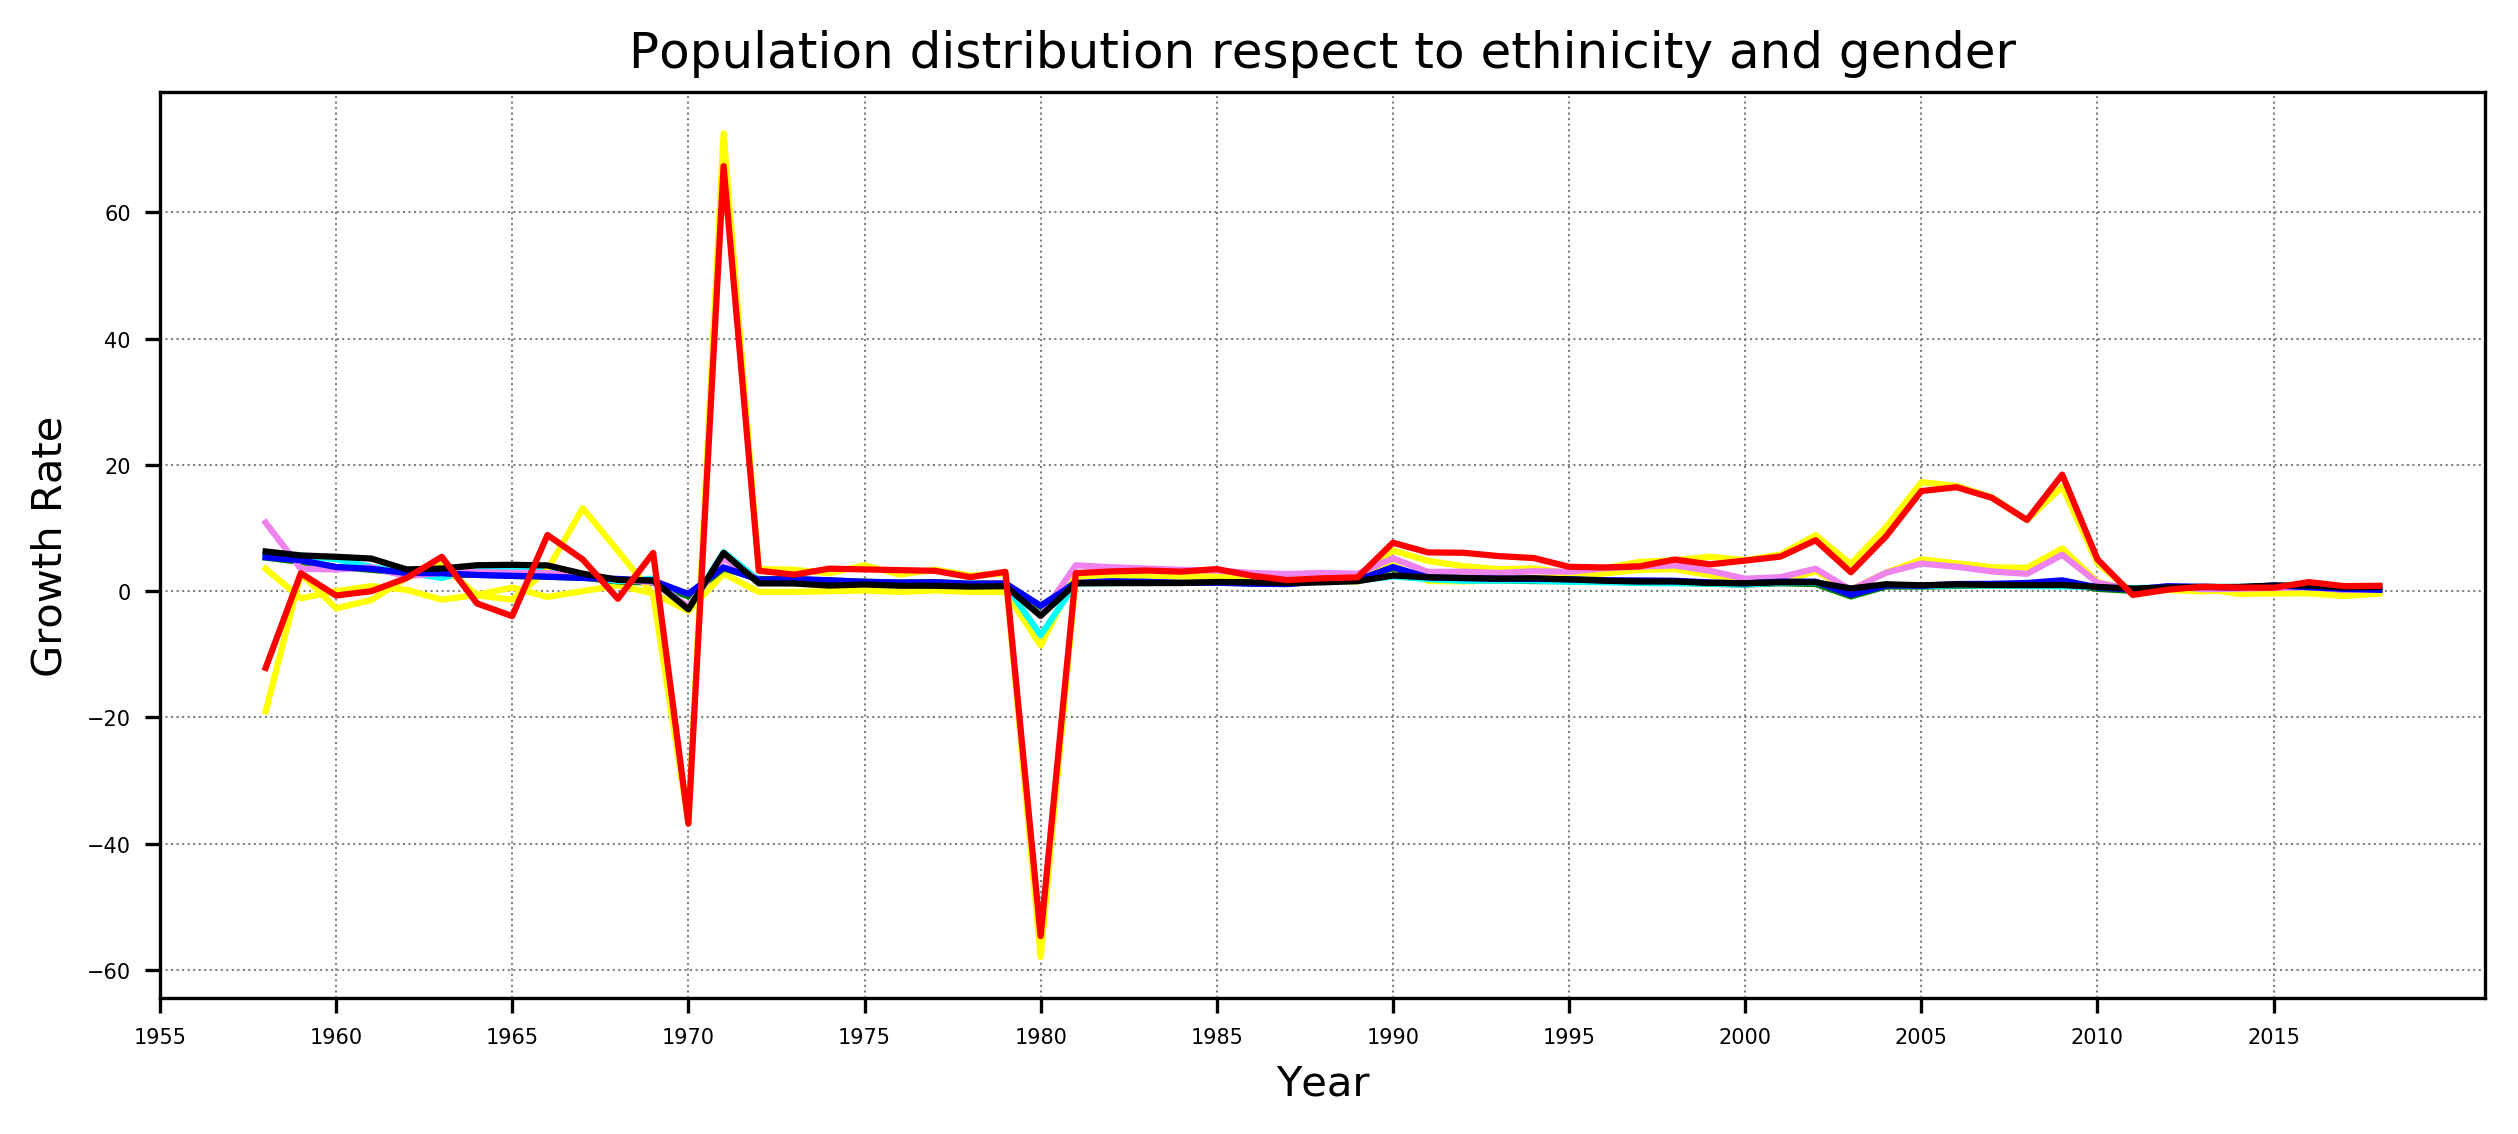

In [148]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,4),dpi=150)
plt.title('Population distribution respect to ethinicity and gender')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.plot(tot_pop.year, growth_rate_maleindia,color='yellow')
plt.plot(tot_pop.year, growth_rate_malechina,color='green')
plt.plot(tot_pop.year, growth_rate_malemalay,color='cyan')
plt.plot(tot_pop.year, growth_rate_maleother,color='yellow')
plt.plot(tot_pop.year, growth_rate_femaleindia,color='violet')
plt.plot(tot_pop.year, growth_rate_femalechina,color='blue')
plt.plot(tot_pop.year, growth_rate_femalemalay,color='k')
plt.plot(tot_pop.year, growth_rate_femaleother,color='red')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))
plt.tick_params(axis='both', which='major', labelsize=5)

#### The above plot gives the population growth distribution of ethnic groups and gender. This plot is very much similar to the plot that is plotted growth distribution ith respect to ethinc group.

In [134]:
chinese_pop=grp[grp.level_1=='Total Chinese']
chinese_pop.reset_index(drop=True,inplace=True)
tot_pop.reset_index(drop=True,inplace=True)

In [135]:
for i in range(0,63):
    chinese_pop['contribution']=chinese_pop.value/tot_pop.value*100

C:\Users\Hemanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


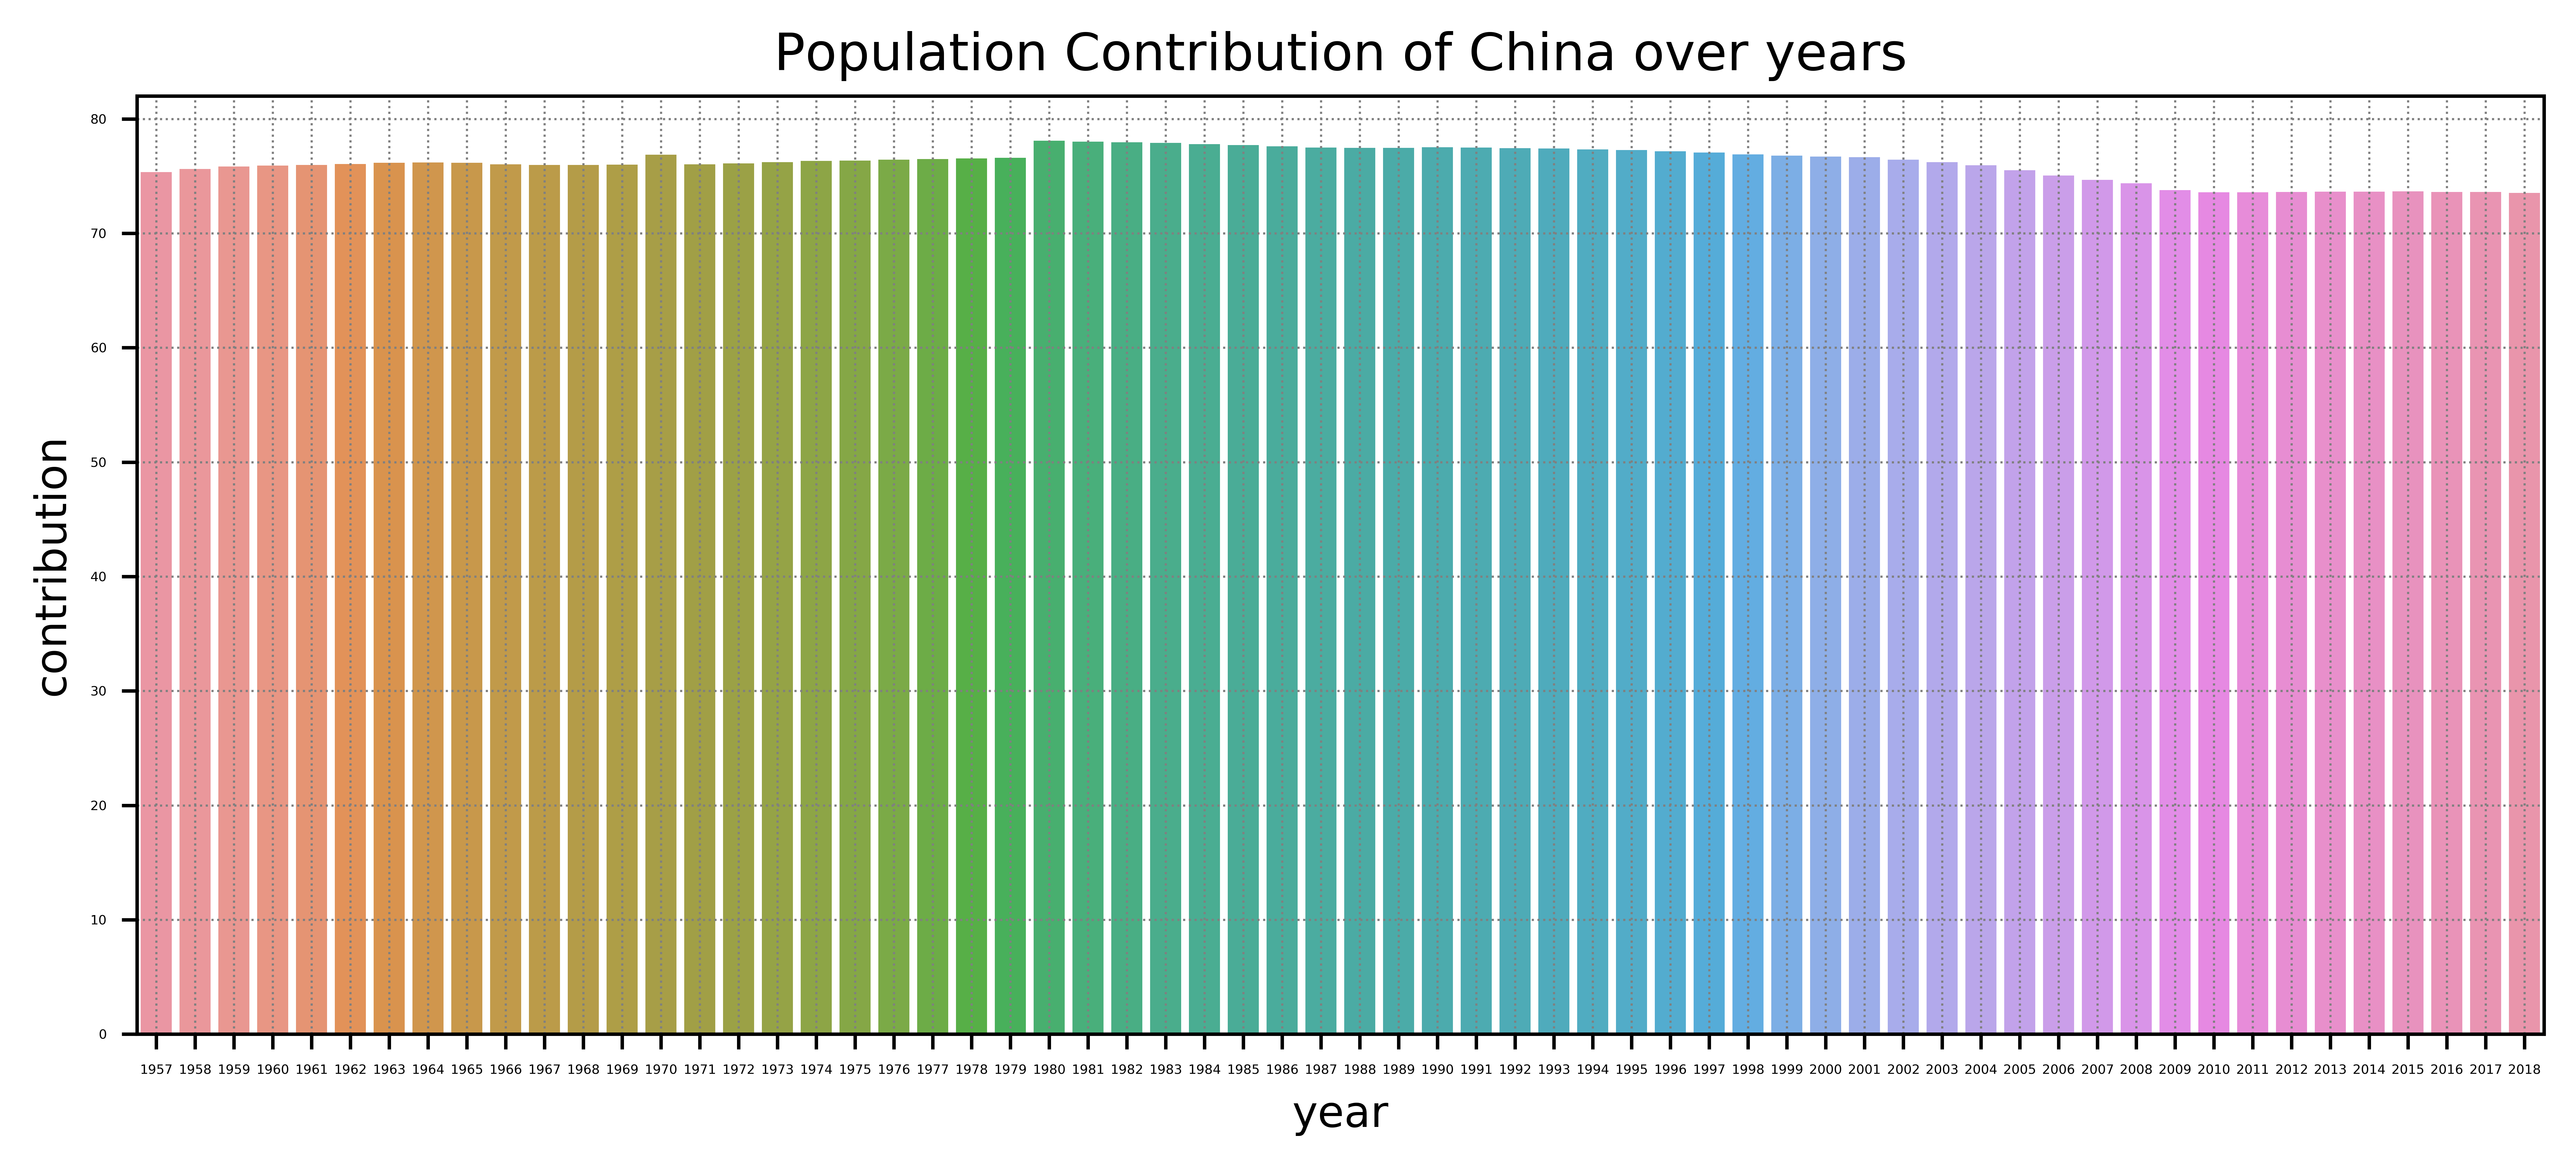

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,4),dpi=500)
plt.title('Population Contribution of China over years')
plt.xlabel('Year')
plt.ylabel("Contribution [%]")
a=sns.barplot(x=chinese_pop.year, y=chinese_pop.contribution)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.tick_params(axis='both', which='major', labelsize=3)
plt.show()

#### The highest contribution of ethnic group is China. Its contribution in SIngapore population is around 76%. Its contribution is almost constant staggering around 75%

In [137]:
df=data[(data.year==2018) & (data.level_1=='Total Residents') ]

In [138]:
df

,year,level_1,level_2,value
20130,2018,Total Residents,1,185528
20131,2018,Total Residents,2,199066
20132,2018,Total Residents,3,206530
20133,2018,Total Residents,4,226520
20134,2018,Total Residents,5,255516
20135,2018,Total Residents,6,291631
20136,2018,Total Residents,7,281397
20137,2018,Total Residents,8,303720
20138,2018,Total Residents,9,303640
20139,2018,Total Residents,10,307838


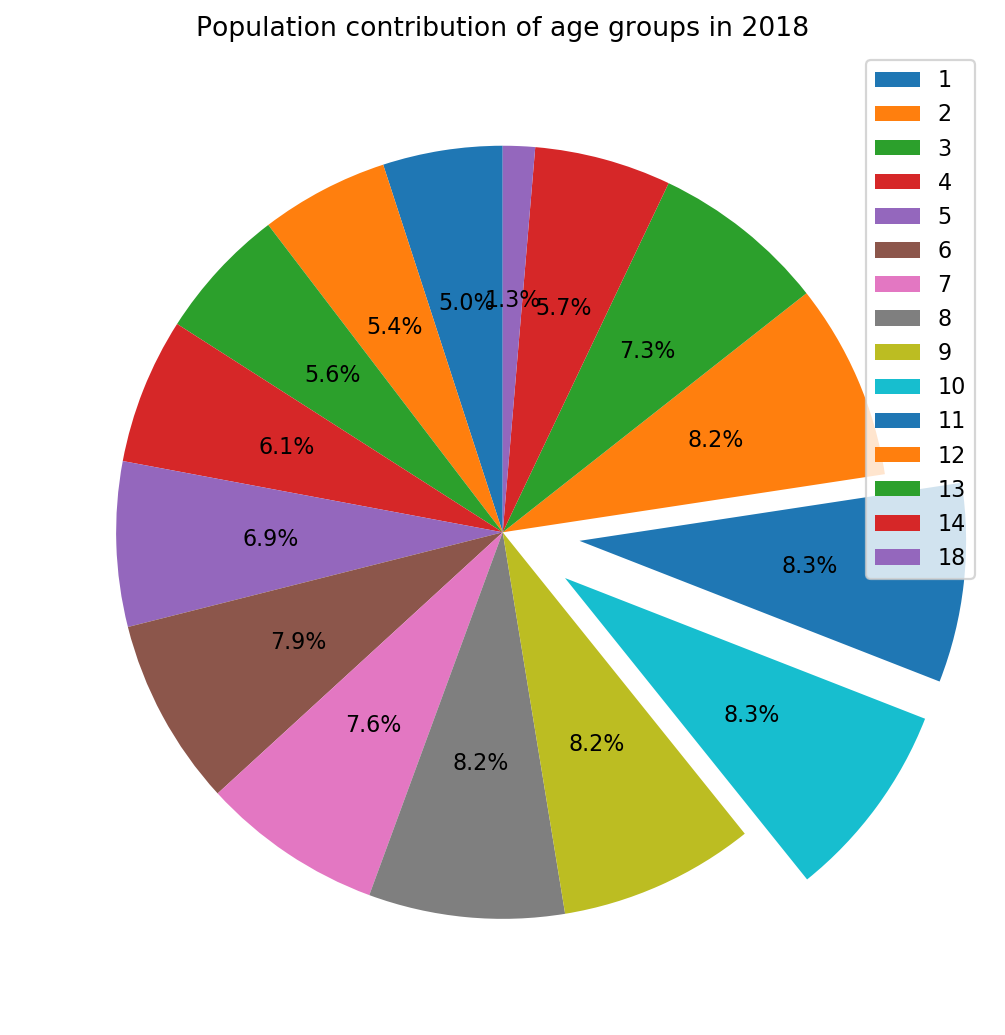

In [150]:
plt.figure(figsize=(8,8),dpi=80)
plt.title('Population contribution of age groups in 2018',)
plt.pie(df.value, autopct='%1.1f%%', startangle=90,explode = (0,0,0,0,0,0,0,0,0,0.2,0.2,0,0,0,0))
labels=df.level_2
plt.legend(labels)

#### The above pie chart shows the population contriibution of each age group in 2018. Maximum population is contributed by group number 10 and 11. These classes belongs to 45 years to 54 years.

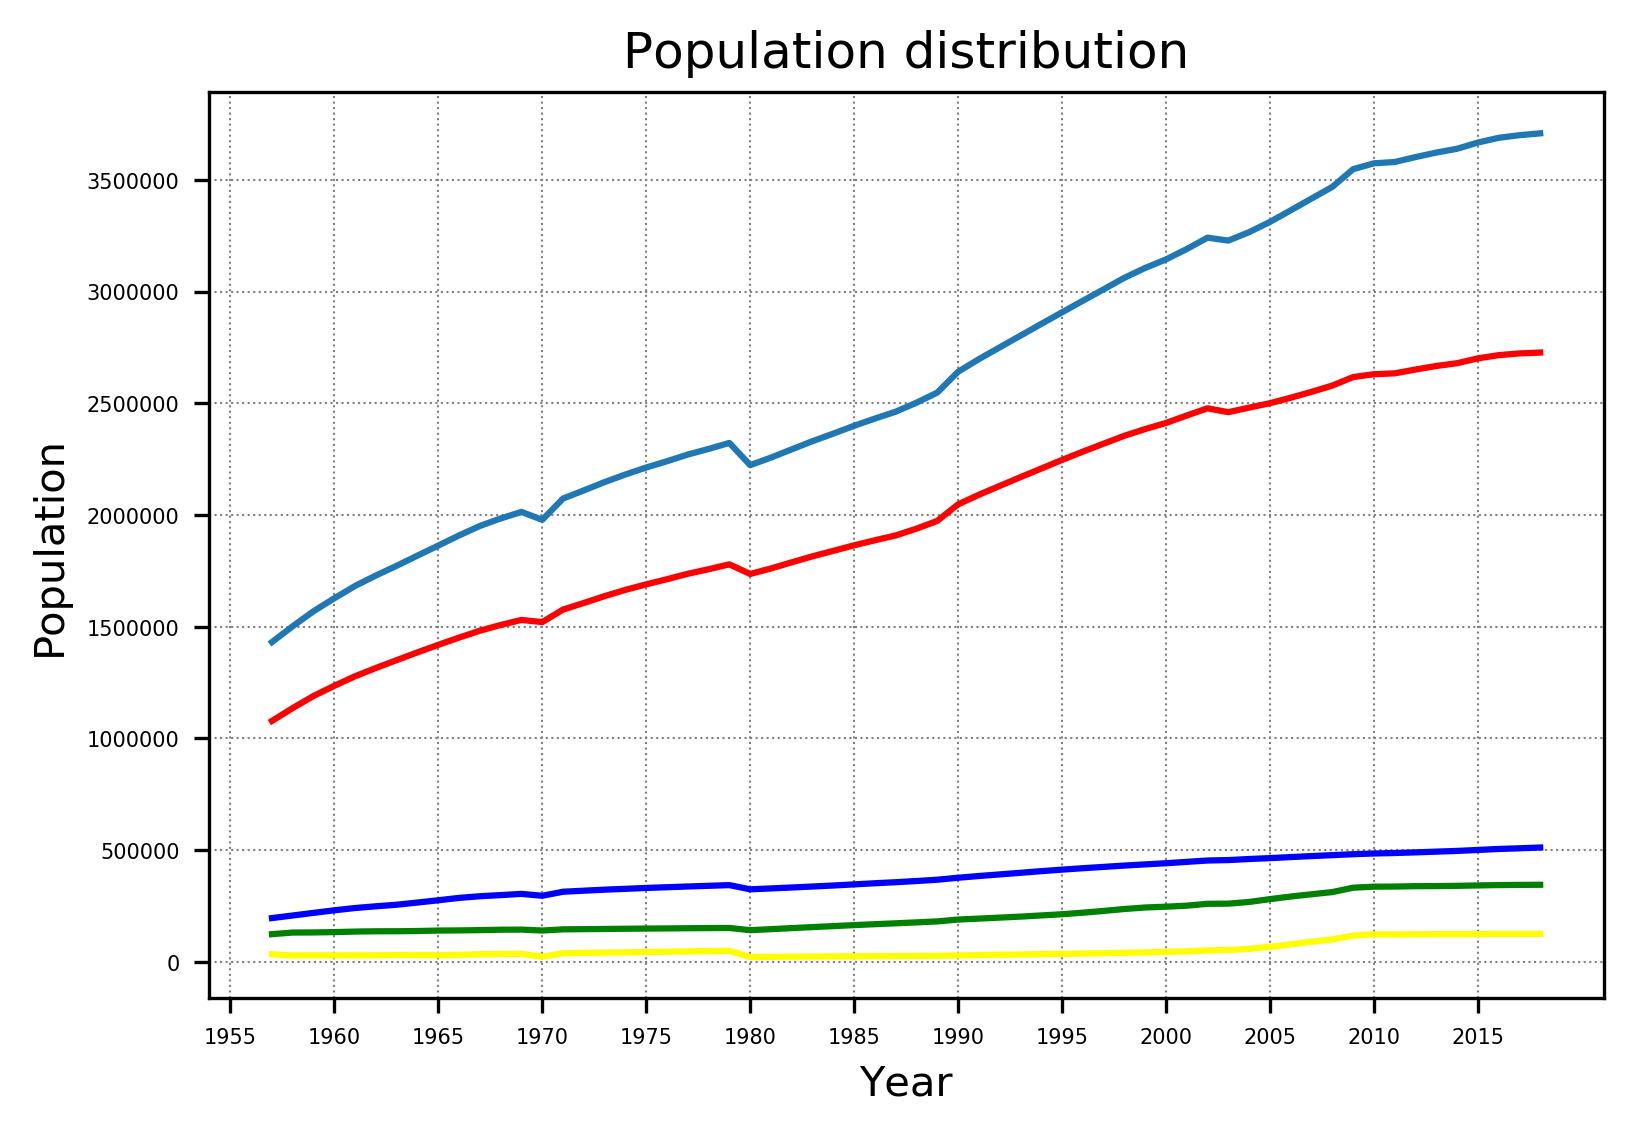

In [151]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.title('Population distribution')
plt.xlabel('Year')
plt.ylabel('Population')
plt.plot(tot_pop.year, tot_pop.value, linestyle='-')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Total Chinese"].value, color='red')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Total Indians"].value, color='green')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Total Malays"].value, color='blue')
plt.plot(tot_pop.year, ethinicity[ethinicity.level_1=="Other Ethnic Groups (Total)"].value, color='yellow')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='grey')
plt.xticks(np.arange(1955, 2020, step=5))
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

#### As we have seen in the plots, 'other' ethinc group has the exceptionally high growth in 1971. Hence, the maximum growth was obserrved from male other ethinc group. On the other hand, if we look over the period, others ethnic group has the lowest growth rate. The variation in growth rate is very low, when gender is considered. This can be visualised from the plot where growth rate is plotted against years. In this plot the fluctuations are minimum and hence, when gender is considered growth is least fluctuating and remained same comparitively. The following statements are made by observing the slope of the trend.

#### Other thinic group has least growth rate, though the fluctiations are present in this group.

#### China and Malay populations has more population growth

#### The  pie chart in above cells shows the population contriibution of each age group in 2018. Maximum population is contributed by group number 10 and 11. These classes belongs to 45 years to 54 years.

#### Female growth rate is comapritively higher than female. This can be obsereved from the plot where population growth with respect to gedner.

#### China has the maximum population contribution which is around 75%. This can be observed on the bar graph above where contribution is plotted over the years.

#### There is  sudden drop in population growth in SInagapore in the year 1980. This might be due to some changes in government policies or economic conditions etc. The reason for steep decline in population growth can be studied as future work for this work. Using Time series algorithms, Population or population growth can be predicted.